In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score as r2
from sklearn.feature_selection import f_regression
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn.ensemble import AdaBoostRegressor
from scipy import stats


from yellowbrick.regressor import ResidualsPlot
%matplotlib inline

In [119]:
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing  65.0              263.0             
1  Afghanistan  2014  Developing  59.9              271.0             
2  Afghanistan  2013  Developing  59.9              268.0             
3  Afghanistan  2012  Developing  59.5              272.0             
4  Afghanistan  2011  Developing  59.2              275.0             

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0  62             0.01     71.279624               65.0         1154       
1  64             0.01     73.523582               62.0         492        
2  66             0.01     73.219243               64.0         430        
3  69             0.01     78.184215               67.0         2787       
4  71             0.01     7.097109                68.0         3013       

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0  19.1   83                  6.0    8.16               65.0          
1  18.6   86                  58.0   8.18               62.0          
2  18.1   89                  62.0   8.13               64.0          
3  17.6   93                  67.0   8.52               67.0          
4  17.2   97                  68.0   7.87               68.0          

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0  0.1        584.259210  33736494.0  17.2                    
1  0.1        612.696514  327582.0    17.5                    
2  0.1        631.744976  31731688.0  17.7                    
3  0.1        669.959000  3696958.0   17.9                    
4  0.1        63.537231   2978599.0   18.2                    

    thinness 5-9 years  Income composition of resources  Schooling  
0  17.3                 0.479                            10.1       
1  17.5                 0.476                            10.0       
2  17.7                 0.470                            9.9        
3  18.0                 0.463                            9.8        
4  18.2                 0.454                            9.5

In [120]:
#renaming columns so that they are convinient to work with later

df.columns=['Country','Year','Status','Life_Expectancy',
            'Adult_Mortality','Infant_Deaths','Alcohol',
            'Percentage_Expenditure','Hepatitis_B','Measles',
            'BMI','Under_Five_Deaths','Polio','Total_Expenditure',
            'Diptheria','HIV/AIDS','GDP','Population','Thinness',
            'Thinness_5-9_Years','Income_Composition','Schooling']

#rearranging columns so that similiar features are grouped together

cols=['Country','Year','Population','Status','GDP','Schooling','Adult_Mortality','Infant_Deaths',
   'Under_Five_Deaths','BMI','Alcohol','Polio','Hepatitis_B','Measles','HIV/AIDS',
     'Diptheria','Thinness','Thinness_5-9_Years','Income_Composition',
    'Percentage_Expenditure',  'Total_Expenditure','Life_Expectancy']
df=df[cols]
df.head()


Country  Year  Population      Status         GDP  Schooling  \
0  Afghanistan  2015  33736494.0  Developing  584.259210  10.1        
1  Afghanistan  2014  327582.0    Developing  612.696514  10.0        
2  Afghanistan  2013  31731688.0  Developing  631.744976  9.9         
3  Afghanistan  2012  3696958.0   Developing  669.959000  9.8         
4  Afghanistan  2011  2978599.0   Developing  63.537231   9.5         

   Adult_Mortality  Infant_Deaths  Under_Five_Deaths   BMI  Alcohol  Polio  \
0  263.0            62             83                 19.1  0.01     6.0     
1  271.0            64             86                 18.6  0.01     58.0    
2  268.0            66             89                 18.1  0.01     62.0    
3  272.0            69             93                 17.6  0.01     67.0    
4  275.0            71             97                 17.2  0.01     68.0    

   Hepatitis_B  Measles  HIV/AIDS  Diptheria  Thinness  Thinness_5-9_Years  \
0  65.0         1154     0.1       65.0       17.2      17.3                 
1  62.0         492      0.1       62.0       17.5      17.5                 
2  64.0         430      0.1       64.0       17.7      17.7                 
3  67.0         2787     0.1       67.0       17.9      18.0                 
4  68.0         3013     0.1       68.0       18.2      18.2                 

   Income_Composition  Percentage_Expenditure  Total_Expenditure  \
0  0.479               71.279624               8.16                
1  0.476               73.523582               8.18                
2  0.470               73.219243               8.13                
3  0.463               78.184215               8.52                
4  0.454               7.097109                7.87                

   Life_Expectancy  
0  65.0             
1  59.9             
2  59.9             
3  59.5             
4  59.2

In [121]:
print('The total number of columns is:',df.shape[1])
print('The total number of rows is:',df.shape[0])

The total number of columns is: 22
The total number of rows is: 2938


In [122]:
#data cleaning 
df.isna().sum()

Country                   0  
Year                      0  
Population                652
Status                    0  
GDP                       448
Schooling                 163
Adult_Mortality           10 
Infant_Deaths             0  
Under_Five_Deaths         0  
BMI                       34 
Alcohol                   194
Polio                     19 
Hepatitis_B               553
Measles                   0  
HIV/AIDS                  0  
Diptheria                 19 
Thinness                  34 
Thinness_5-9_Years        34 
Income_Composition        167
Percentage_Expenditure    0  
Total_Expenditure         226
Life_Expectancy           10 
dtype: int64

In [123]:

na_value_df=df.isna().sum().reset_index()
na_value_df.columns=["Features","Missing_Values"]
na_value_df['Percentage %']=(na_value_df.Missing_Values/len(df))*100
na_value_df


Features  Missing_Values  Percentage %
0   Country                 0               0.000000    
1   Year                    0               0.000000    
2   Population              652             22.191967   
3   Status                  0               0.000000    
4   GDP                     448             15.248468   
5   Schooling               163             5.547992    
6   Adult_Mortality         10              0.340368    
7   Infant_Deaths           0               0.000000    
8   Under_Five_Deaths       0               0.000000    
9   BMI                     34              1.157250    
10  Alcohol                 194             6.603131    
11  Polio                   19              0.646698    
12  Hepatitis_B             553             18.822328   
13  Measles                 0               0.000000    
14  HIV/AIDS                0               0.000000    
15  Diptheria               19              0.646698    
16  Thinness                34              1.157250    
17  Thinness_5-9_Years      34              1.157250    
18  Income_Composition      167             5.684139    
19  Percentage_Expenditure  0               0.000000    
20  Total_Expenditure       226             7.692308    
21  Life_Expectancy         10              0.340368

In [124]:
#since we aim to predict the life expectancy , dropping rows which has 
# na value % less than 5.Because it is too insignifacnt to change the results.

df=df.dropna(subset=['Life_Expectancy','Thinness_5-9_Years','Thinness','Diptheria','Polio','BMI','Adult_Mortality'])

na_value_df_1=df.isna().sum().reset_index()
na_value_df_1.columns=["Features","Missing_Values"]
na_value_df_1['Percentage %']=(na_value_df_1.Missing_Values/len(df))*100
na_value_df_1



Features  Missing_Values  Percentage %
0   Country                 0               0.000000    
1   Year                    0               0.000000    
2   Population              644             22.299169   
3   Status                  0               0.000000    
4   GDP                     435             15.062327   
5   Schooling               160             5.540166    
6   Adult_Mortality         0               0.000000    
7   Infant_Deaths           0               0.000000    
8   Under_Five_Deaths       0               0.000000    
9   BMI                     0               0.000000    
10  Alcohol                 175             6.059557    
11  Polio                   0               0.000000    
12  Hepatitis_B             525             18.178670   
13  Measles                 0               0.000000    
14  HIV/AIDS                0               0.000000    
15  Diptheria               0               0.000000    
16  Thinness                0               0.000000    
17  Thinness_5-9_Years      0               0.000000    
18  Income_Composition      160             5.540166    
19  Percentage_Expenditure  0               0.000000    
20  Total_Expenditure       212             7.340720    
21  Life_Expectancy         0               0.000000

In [125]:

cond=[na_value_df['Features'],na_value_df['Missing_Values'],na_value_df_1['Missing_Values']]
na_value_compare=pd.concat(cond,axis=1,keys=["Features","Before","After"])
na_value_compare


Features  Before  After
0   Country                 0       0    
1   Year                    0       0    
2   Population              652     644  
3   Status                  0       0    
4   GDP                     448     435  
5   Schooling               163     160  
6   Adult_Mortality         10      0    
7   Infant_Deaths           0       0    
8   Under_Five_Deaths       0       0    
9   BMI                     34      0    
10  Alcohol                 194     175  
11  Polio                   19      0    
12  Hepatitis_B             553     525  
13  Measles                 0       0    
14  HIV/AIDS                0       0    
15  Diptheria               19      0    
16  Thinness                34      0    
17  Thinness_5-9_Years      34      0    
18  Income_Composition      167     160  
19  Percentage_Expenditure  0       0    
20  Total_Expenditure       226     212  
21  Life_Expectancy         10      0

In [126]:

#filling the columns which has percentage na values greater than 5% (the significant ones)
a=na_value_df_1['Features'].loc[na_value_df_1['Percentage %']!=0.000000]
a=a.tolist()
a


['Population',
 'GDP',
 'Schooling',
 'Alcohol',
 'Hepatitis_B',
 'Income_Composition',
 'Total_Expenditure']

In [127]:
df_copy=df.copy()
df_copy[df_copy==0]=np.nan
df_mean=pd.pivot_table(df_copy,index=['Country'],values=['Life_Expectancy','Hepatitis_B','Adult_Mortality','Alcohol','BMI','Total_Expenditure','Population','Income_Composition','GDP','Thinness_5-9_Years','Schooling'],
                         aggfunc=np.nanmean)
df_mean

Adult_Mortality  \
Country                                                                 
Afghanistan                                           269.062500        
Albania                                               45.062500         
Algeria                                               108.187500        
Angola                                                328.562500        
Antigua and Barbuda                                   127.500000        
Argentina                                             106.000000        
Armenia                                               117.375000        
Australia                                             63.187500         
Austria                                               65.750000         
Azerbaijan                                            115.187500        
Bahamas                                               152.062500        
Bahrain                                               65.375000         
Bangladesh                                            141.375000        
Barbados                                              77.625000         
Belarus                                               218.750000        
Belgium                                               70.187500         
Belize                                                155.500000        
Benin                                                 269.375000        
Bhutan                                                230.250000        
Bolivia (Plurinational State of)                      177.500000        
Bosnia and Herzegovina                                64.937500         
Botswana                                              448.125000        
Brazil                                                150.687500        
Brunei Darussalam                                     67.062500         
Bulgaria                                              125.500000        
Burkina Faso                                          252.500000        
Burundi                                               291.562500        
Cabo Verde                                            116.187500        
Cambodia                                              196.375000        
Cameroon                                              294.875000        
Canada                                                64.625000         
Central African Republic                              333.062500        
Chad                                                  227.750000        
Chile                                                 63.625000         
China                                                 73.750000         
Colombia                                              124.250000        
Comoros                                               240.937500        
Congo                                                 322.750000        
Costa Rica                                            69.375000         
Croatia                                               89.000000         
Cuba                                                  57.562500         
Cyprus                                                54.125000         
Czechia                                               71.812500         
Côte d'Ivoire                                         417.312500        
Democratic People's Republic of Korea                 160.812500        
Democratic Republic of the Congo                      265.375000        
Denmark                                               66.062500         
Djibouti                                              274.687500        
Dominican Republic                                    143.500000        
Ecuador                                               132.125000        
Egypt                                                 170.625000        
El Salvador                                           155.062500        
Equatorial Guinea                                     279.375000        
Eritrea                                

In [128]:
#analysis
df_mean['Life_Expectancy'].sort_values(ascending=True)[:10]

Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life_Expectancy, dtype: float64

In [129]:
df_mean['Life_Expectancy'].sort_values(ascending=False)[:10]

Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life_Expectancy, dtype: float64

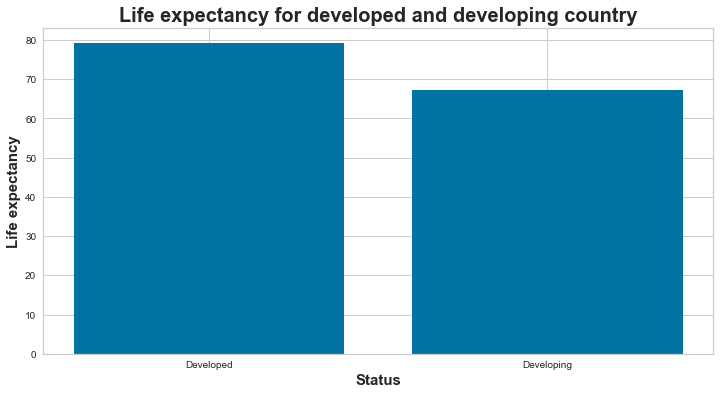

Status
Developed     79.197852
Developing    67.227146
Name: Life_Expectancy, dtype: float64


In [130]:
plt.figure(figsize=(12,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=15,fontweight="bold")
plt.ylabel("Life expectancy",fontsize=15,fontweight="bold")
plt.title("Life expectancy for developed and developing country",fontsize=20,fontweight="bold")
plt.show()

print(df.groupby('Status')['Life_Expectancy'].mean())

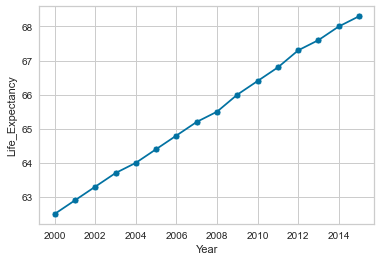

In [131]:
india=india = df.loc[df['Country'] == "India"]

sns.scatterplot(x=india["Year"],y=india["Life_Expectancy"])
sns.lineplot(x=india["Year"],y=india["Life_Expectancy"])

#Life expectancy got better per year
#we can use linear regression to predict what will the life expectancy will be in the future(?)

In [132]:

def fill_na_mean(df,feature):
    df[feature]=df[feature].fillna(df[feature].mean())

significant_features=['Population','GDP','Schooling','Alcohol','Hepatitis_B',
 'Income_Composition','Total_Expenditure']

for i in significant_features:
    fill_na_mean(df,i)
    
df.isna().sum()


Country                   0
Year                      0
Population                0
Status                    0
GDP                       0
Schooling                 0
Adult_Mortality           0
Infant_Deaths             0
Under_Five_Deaths         0
BMI                       0
Alcohol                   0
Polio                     0
Hepatitis_B               0
Measles                   0
HIV/AIDS                  0
Diptheria                 0
Thinness                  0
Thinness_5-9_Years        0
Income_Composition        0
Percentage_Expenditure    0
Total_Expenditure         0
Life_Expectancy           0
dtype: int64

In [133]:
#label encoding (converting categorical values to numeric values)

#since we have 2 columns with non-numeric vales , we will convert these into
#numeric so that we can prepare our regression model.
#We will also do this with the "Year" column since the information it contains
#doesnt add much value and we can potray the same information with some other
#variable so we can change its values too

le=LabelEncoder()

columns=["Country","Year","Status"]
for i in columns:
    df[i]=le.fit_transform(df[i])

df.head()
    

Country  Year  Population  Status         GDP  Schooling  Adult_Mortality  \
0  0        15    33736494.0  1       584.259210  10.1       263.0             
1  0        14    327582.0    1       612.696514  10.0       271.0             
2  0        13    31731688.0  1       631.744976  9.9        268.0             
3  0        12    3696958.0   1       669.959000  9.8        272.0             
4  0        11    2978599.0   1       63.537231   9.5        275.0             

   Infant_Deaths  Under_Five_Deaths   BMI  Alcohol  Polio  Hepatitis_B  \
0  62             83                 19.1  0.01     6.0    65.0          
1  64             86                 18.6  0.01     58.0   62.0          
2  66             89                 18.1  0.01     62.0   64.0          
3  69             93                 17.6  0.01     67.0   67.0          
4  71             97                 17.2  0.01     68.0   68.0          

   Measles  HIV/AIDS  Diptheria  Thinness  Thinness_5-9_Years  \
0  1154     0.1       65.0       17.2      17.3                 
1  492      0.1       62.0       17.5      17.5                 
2  430      0.1       64.0       17.7      17.7                 
3  2787     0.1       67.0       17.9      18.0                 
4  3013     0.1       68.0       18.2      18.2                 

   Income_Composition  Percentage_Expenditure  Total_Expenditure  \
0  0.479               71.279624               8.16                
1  0.476               73.523582               8.18                
2  0.470               73.219243               8.13                
3  0.463               78.184215               8.52                
4  0.454               7.097109                7.87                

   Life_Expectancy  
0  65.0             
1  59.9             
2  59.9             
3  59.5             
4  59.2

In [134]:
print(df.shape)
z=np.abs(stats.zscore(df))
thresh=3
df=df[(z<3).all(axis=1)]
print(df.shape)



(2888, 22)
(2160, 22)


In [135]:
df

Country  Year    Population  Status           GDP  Schooling  \
1     0        14    3.275820e+05  1       612.696514    10.000000   
2     0        13    3.173169e+07  1       631.744976    9.900000    
3     0        12    3.696958e+06  1       669.959000    9.800000    
14    0        1     2.966463e+06  1       117.496980    5.900000    
15    0        0     2.937560e+05  1       114.560000    5.500000    
16    1        15    2.887300e+04  1       3954.227830   14.200000   
17    1        14    2.889140e+05  1       4575.763787   14.200000   
18    1        13    2.895920e+05  1       4414.723140   14.200000   
19    1        12    2.941000e+03  1       4247.614380   14.200000   
20    1        11    2.951950e+05  1       4437.178680   13.300000   
21    1        10    2.913210e+05  1       494.358832    12.500000   
22    1        9     2.927519e+06  1       4114.136545   12.200000   
23    1        8     2.947314e+06  1       437.539647    12.000000   
24    1        7     2.971700e+04  1       363.136850    11.600000   
25    1        6     2.992547e+06  1       35.129300     11.400000   
26    1        5     3.114870e+05  1       279.142931    10.800000   
27    1        4     3.269390e+05  1       2416.588235   10.900000   
28    1        3     3.396160e+05  1       189.681557    10.700000   
29    1        2     3.511000e+03  1       1453.642777   10.700000   
30    1        1     3.617300e+04  1       1326.973390   10.600000   
31    1        0     3.892700e+04  1       1175.788981   10.700000   
32    2        15    3.987153e+07  1       4132.762920   14.400000   
33    2        14    3.911331e+07  1       547.851700    14.400000   
34    2        13    3.833856e+07  1       5471.866766   14.400000   
35    2        12    3.756585e+07  1       5564.825660   14.400000   
36    2        11    3.681956e+07  1       5432.252300   14.000000   
37    2        10    3.611764e+07  1       4463.394675   13.600000   
38    2        9     3.546576e+06  1       3868.831230   13.100000   
39    2        8     3.486715e+06  1       495.254866    12.600000   
42    2        5     3.328844e+07  1       31.122378     12.000000   
43    2        4     3.283196e+06  1       2598.982300   11.700000   
44    2        3     3.243514e+06  1       294.335560    11.500000   
45    2        2     3.199546e+06  1       1774.336730   11.100000   
46    2        1     3.159215e+07  1       1732.857979   10.900000   
47    2        0     3.118366e+06  1       1757.177970   10.700000   
49    3        14    2.692466e+06  1       479.312240    11.400000   
50    3        13    2.599834e+06  1       484.616884    11.400000   
51    3        12    2.596150e+05  1       4598.249988   10.300000   
52    3        11    2.421856e+07  1       4299.128890   9.400000    
53    3        10    2.336913e+07  1       3529.534820   9.000000    
55    3        8     2.175942e+06  1       3868.578883   8.100000    
56    3        7     2.997687e+06  1       2878.837144   7.700000    
57    3        6     2.262399e+06  1       262.415149    7.200000    
58    3        5     1.955254e+07  1       1443.991929   6.800000    
61    3        2     1.757265e+07  1       711.181716    5.500000    
62    3        1     1.698327e+07  1       526.168743    5.100000    
64    4        15    1.283534e+07  1       13566.954100  13.900000   
65    4        14    1.283534e+07  1       12888.296670  13.900000   
66    4        13    1.283534e+07  1       12224.864160  13.900000   
67    4        12    1.283534e+07  1       12565.441970  13.800000   
68    4        11    1.283534e+07  1       11929.349910  14.100000   
69    4        10    1.283534e+07  1       12126.876140  14.100000   
70    4        9     1.283534e+07  1       1312.466920   14.200000   
71    4        8     1.283534e+07  1       1473.319230   14.400000   
72    4        7     1.283534e+07  1       14252.294520  14.500000   
73    4        6     1.283534e+07  1       12724.393770  14.700000   
80    5        1

In [136]:
'''pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
'''
df_copy=df.copy()
df_copy[df_copy==0]=np.nan
df_mean=pd.pivot_table(df_copy,index=['Country'],values=['Life_Expectancy','Hepatitis_B','Adult_Mortality','Alcohol','BMI','Total_Expenditure','Population','Income_Composition','GDP','Thinness_5-9_Years','Schooling'],
                         aggfunc=np.nanmean)
df_mean

Adult_Mortality    Alcohol        BMI           GDP  Hepatitis_B  \
Country                                                                     
1.0      45.062500        4.848750   49.068750  2119.726679   98.000000     
2.0      105.000000       0.710274   51.735714  2726.132360   88.792002     
3.0      339.181818       6.384545   17.800000  2098.365126   75.553457     
4.0      113.000000       7.930383   44.790000  10506.425739  98.400000     
5.0      104.666667       7.715589   54.740000  6868.256158   86.069601     
6.0      114.928571       3.710274   44.057143  1944.081099   87.500000     
7.0      69.571429        10.050000  45.400000  13037.772314  94.714286     
8.0      74.444444        11.518203  42.877778  22019.091277  75.666667     
9.0      114.666667       1.293652   43.408333  3635.124536   76.753668     
10.0     148.142857       9.743845   56.114286  7576.831245   88.928571     
11.0     65.375000        2.103989   51.656250  11191.247421  98.125000     
12.0     129.000000       4.643830   18.300000  121.158120    97.000000     
13.0     78.928571        7.977416   48.892857  13532.079961  83.215858     
14.0     211.833333       12.618652  54.008333  3886.115769   97.583333     
15.0     77.181818        10.336712  46.727273  13343.595604  88.909091     
16.0     155.500000       6.152114   37.675000  3933.012174   94.750000     
17.0     270.384615       1.334141   20.361538  560.421537    72.618770     
18.0     218.800000       0.980766   22.760000  2050.720125   97.400000     
19.0     199.642857       3.321702   44.507143  7576.831245   87.642857     
20.0     69.142857        4.619119   53.900000  2295.747506   89.142857     
21.0     323.400000       4.065383   35.490000  5072.678519   94.400000     
22.0     159.600000       6.964383   45.630000  6088.532931   95.500000     
23.0     66.266667        0.687589   29.153333  17884.377982  97.800000     
24.0     125.500000       10.476489  54.500000  4938.981821   94.500000     
25.0     155.666667       3.850638   16.950000  476.282870    88.000000     
26.0     285.266667       3.972255   15.480000  137.936446    90.871068     
27.0     106.833333       3.347819   24.633333  2343.954093   93.000000     
28.0     189.500000       1.656702   15.650000  471.288897    85.222145     
29.0     305.384615       3.819525   23.276923  778.863363    83.162310     
30.0     67.600000        7.574383   50.840000  22134.554775  45.106602     
31.0     351.666667       1.439589   17.106667  371.049055    63.078403     
32.0     187.272727       0.774894   16.336364  362.342657    61.012003     
33.0     60.714286        6.810988   54.650000  4847.441664   88.580860     
34.0     89.333333        5.720000   11.966667  4249.818364   99.000000     
35.0     119.928571       4.437416   49.142857  3059.809428   89.071429     
36.0     227.272727       0.534894   18.363636  701.828105    80.818182     
37.0     326.666667       2.193333   21.075000  7576.831245   76.594336     
38.0     67.777778        3.895981   48.433333  3581.906272   89.666667     
39.0     89.000000        11.960239  52.356250  9056.784719   89.572128     
40.0     57.562500        4.218989   49.462500  3180.434884   96.250000     
41.0     54.125000        9.909614   53.162500  13898.885501  92.625000     
42.0     71.812500        12.502114  55.712500  7576.831245   95.252751     
43.0     409.615385       2.905679   22.469231  7576.831245   75.617077     
44.0     160.812500       3.102739   25.625000  7576.831245   87.379126     
45.0     294.250000       2.673457   18.625000  7576.831245   74.755501     
46.0     41.285714        10.150547  54.871429  8797.405173   81.022006     
47.0     274.687500       1.006489   26.250000  897.999871    79.322128     
48.0     151.000000       5.941152   45.691667  3211.951574   77.416667     
49.0     128.769231       3.847987   45.884615  2073.539724   83.307692     
50.0     170.625000       0.467114   49.262500  7576.831245   96.687500     
51.0 

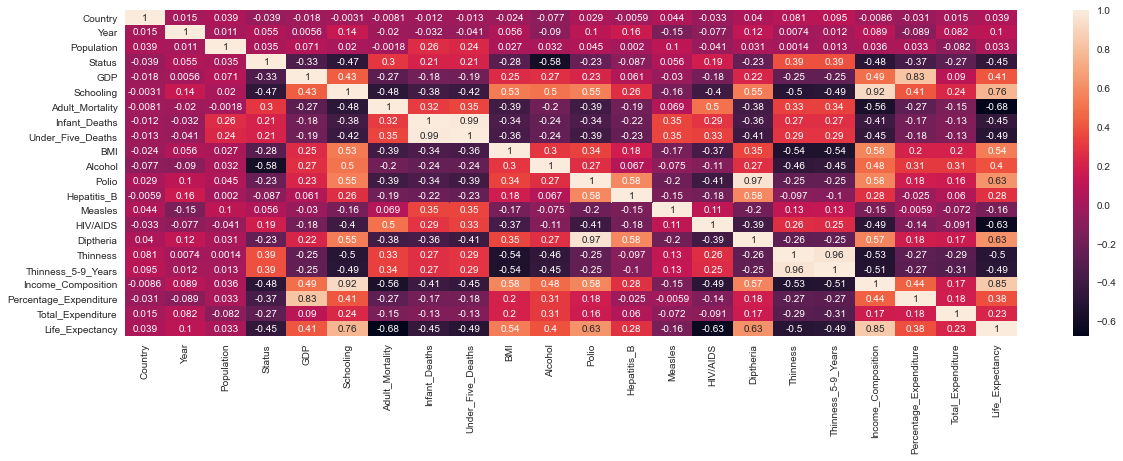

In [137]:
#feature selection- 3 types Filter,Wrapper and Embedded
#we are using filter->removing unneccsary features
#pearson's correlation (correlation divided by the product of std dev^n of the 2 variables)

def calc_pearson_corr(x,y):
    res=pd.corr(x,y)/(np.std(x)*np.std(y))
    return res
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(method='pearson'),annot=True)

#High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
#Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
#Low degree: When the value lies below + .29, then it is said to be a small correlation.

In [138]:
corr_df=df.corr()
corr_df_life=corr_df['Life_Expectancy']
print('The pearson correlation coefficient of all the features are :')
print()
print(corr_df_life.sort_values(ascending=True))
print()
print('Total number of features:')
print(len(corr_df_life))

The pearson correlation coefficient of all the features are :

Adult_Mortality          -0.676991
HIV/AIDS                 -0.634994
Thinness                 -0.496217
Under_Five_Deaths        -0.493821
Thinness_5-9_Years       -0.490719
Status                   -0.454126
Infant_Deaths            -0.447648
Measles                  -0.161824
Population                0.033334
Country                   0.038612
Year                      0.100574
Total_Expenditure         0.225128
Hepatitis_B               0.275626
Percentage_Expenditure    0.382123
Alcohol                   0.395181
GDP                       0.407573
BMI                       0.544884
Diptheria                 0.626585
Polio                     0.632171
Schooling                 0.764795
Income_Composition        0.852385
Life_Expectancy           1.000000
Name: Life_Expectancy, dtype: float64

Total number of features:
22


In [139]:

    
imp_features=corr_df_life[(corr_df_life>0.3) | (corr_df_life <-0.3)]
imp_features=imp_features[:-1]

print('Important features based on pearson correlation coefficient:')
print()
print(imp_features)
print()
print('Total number of desired features:')
print(len(imp_features)) 

Important features based on pearson correlation coefficient:

Status                   -0.454126
GDP                       0.407573
Schooling                 0.764795
Adult_Mortality          -0.676991
Infant_Deaths            -0.447648
Under_Five_Deaths        -0.493821
BMI                       0.544884
Alcohol                   0.395181
Polio                     0.632171
HIV/AIDS                 -0.634994
Diptheria                 0.626585
Thinness                 -0.496217
Thinness_5-9_Years       -0.490719
Income_Composition        0.852385
Percentage_Expenditure    0.382123
Name: Life_Expectancy, dtype: float64

Total number of desired features:
15


In [140]:
target=df['Life_Expectancy']
df=df.drop(['Life_Expectancy'],axis=1)
cols=imp_features.index
df2=df[cols]
df2

Status           GDP  Schooling  Adult_Mortality  Infant_Deaths  \
1     1       612.696514    10.000000  271.0            64              
2     1       631.744976    9.900000   268.0            66              
3     1       669.959000    9.800000   272.0            69              
14    1       117.496980    5.900000   316.0            88              
15    1       114.560000    5.500000   321.0            88              
16    1       3954.227830   14.200000  74.0             0               
17    1       4575.763787   14.200000  8.0              0               
18    1       4414.723140   14.200000  84.0             0               
19    1       4247.614380   14.200000  86.0             0               
20    1       4437.178680   13.300000  88.0             0               
21    1       494.358832    12.500000  91.0             1               
22    1       4114.136545   12.200000  91.0             1               
23    1       437.539647    12.000000  1.0              1               
24    1       363.136850    11.600000  9.0              1               
25    1       35.129300     11.400000  99.0             1               
26    1       279.142931    10.800000  15.0             1               
27    1       2416.588235   10.900000  17.0             1               
28    1       189.681557    10.700000  18.0             1               
29    1       1453.642777   10.700000  15.0             1               
30    1       1326.973390   10.600000  14.0             1               
31    1       1175.788981   10.700000  11.0             1               
32    1       4132.762920   14.400000  19.0             21              
33    1       547.851700    14.400000  11.0             21              
34    1       5471.866766   14.400000  112.0            21              
35    1       5564.825660   14.400000  113.0            21              
36    1       5432.252300   14.000000  116.0            21              
37    1       4463.394675   13.600000  119.0            21              
38    1       3868.831230   13.100000  123.0            20              
39    1       495.254866    12.600000  126.0            20              
42    1       31.122378     12.000000  136.0            19              
43    1       2598.982300   11.700000  14.0             19              
44    1       294.335560    11.500000  146.0            20              
45    1       1774.336730   11.100000  145.0            20              
46    1       1732.857979   10.900000  145.0            20              
47    1       1757.177970   10.700000  145.0            21              
49    1       479.312240    11.400000  348.0            67              
50    1       484.616884    11.400000  355.0            69              
51    1       4598.249988   10.300000  358.0            72              
52    1       4299.128890   9.400000   361.0            75              
53    1       3529.534820   9.000000   365.0            78              
55    1       3868.578883   8.100000   371.0            84              
56    1       2878.837144   7.700000   375.0            87              
57    1       262.415149    7.200000   381.0            90              
58    1       1443.991929   6.800000   382.0            92              
61    1       711.181716    5.500000   391.0            96              
62    1       526.168743    5.100000   44.0             97              
64    1       13566.954100  13.900000  13.0             0               
65    1       12888.296670  13.900000  131.0            0               
66    1       12224.864160  13.900000  133.0            0               
67    1       12565.441970  13.800000  134.0            0               
68    1       11929.349910  14.100000  136.0            0               
69    1       12126.876140  14.100000  138.0            0               
70    1       1312.466920   14.200000  14.0             0               
71    1       1473.319230   14.400000  142.0            0       

In [141]:
X_train,X_test,y_train,y_test=train_test_split(df2,target,test_size=0.3,random_state=101)

In [142]:
model1=LinearRegression()
model1.fit(X_train,y_train)

y_pred_1=model1.predict(X_train)
y_pred_2=model1.predict(X_test)

print("*"*20,"Train R2 Score","*"*20)
print(r2(y_train,y_pred_1))
print('')

print("*"*20,"Test R2 Score","*"*20)
print(r2(y_test,y_pred_2))
print('')


******************** Train R2 Score ********************
0.8518698474659632

******************** Test R2 Score ********************
0.8382015690657472



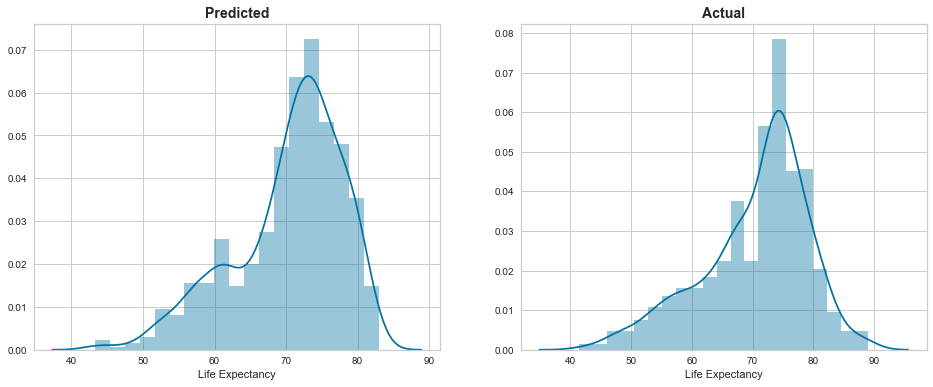

In [143]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(y_pred_2)
plt.xlabel('Life Expectancy')

plt.title('Predicted',weight="bold").set_fontsize('14')
plt.subplot(1,2,2)
sns.distplot(y_test)
plt.xlabel('Life Expectancy')

plt.title('Actual',weight="bold").set_fontsize('14')


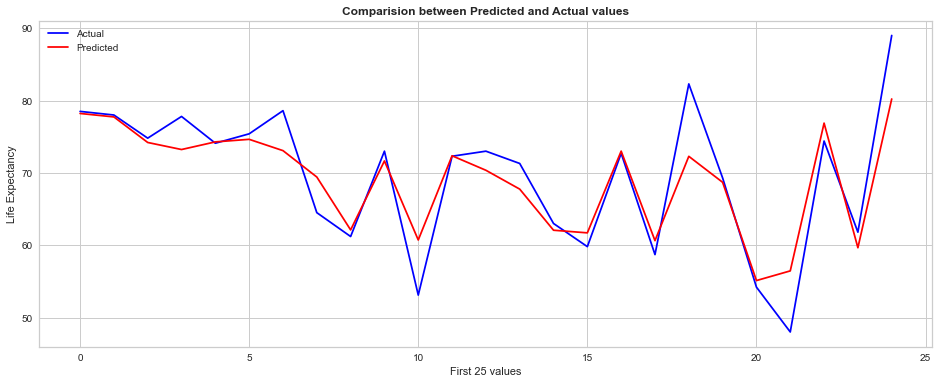

In [144]:
pred_vs_actual={'Actual':y_test,'Predicted':y_pred_2}
df3=pd.DataFrame(data=pred_vs_actual)

df3=df3.reset_index(drop=True)
df3[:10]

plt.figure(figsize=(16,6))
linechart_1=plt.plot(df3[:25].index,y_test[:25],color='Blue')
linechart_2=plt.plot(df3[:25].index,y_pred_2[:25],color='Red')
plt.xlabel('First 25 values')
plt.ylabel('Life Expectancy')
plt.title('Comparision between Predicted and Actual values',fontweight="bold")
plt.legend(['Actual','Predicted'])

In [145]:
df3[:20]

Actual  Predicted
0   78.5    78.214761
1   78.0    77.736166
2   74.8    74.202101
3   77.8    73.228352
4   74.1    74.283760
5   75.4    74.638080
6   78.6    73.075078
7   64.5    69.426993
8   61.2    62.114010
9   73.0    71.648915
10  53.1    60.719741
11  72.3    72.362865
12  73.0    70.358290
13  71.3    67.752816
14  63.0    62.068870
15  59.8    61.705532
16  72.7    73.005195
17  58.7    60.629780
18  82.3    72.287432
19  69.3    68.696532

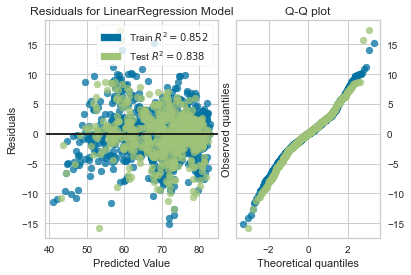

In [146]:
visualizer = ResidualsPlot(model1,hist=False,qqplot=True)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()   

In [149]:

model2=AdaBoostRegressor()
model2.fit(X_train,y_train)
y2_pred_1=model2.predict(X_train)
y2_pred_2=model2.predict(X_test)

print("*"*20,"Train R2 Score","*"*20)
print(r2(y_train,y2_pred_1))
print('')

print("*"*20,"Test R2 Score","*"*20)
print(r2(y_test,y2_pred_2))
print('')


******************** Train R2 Score ********************
0.9001505899340261

******************** Test R2 Score ********************
0.8788421081558755



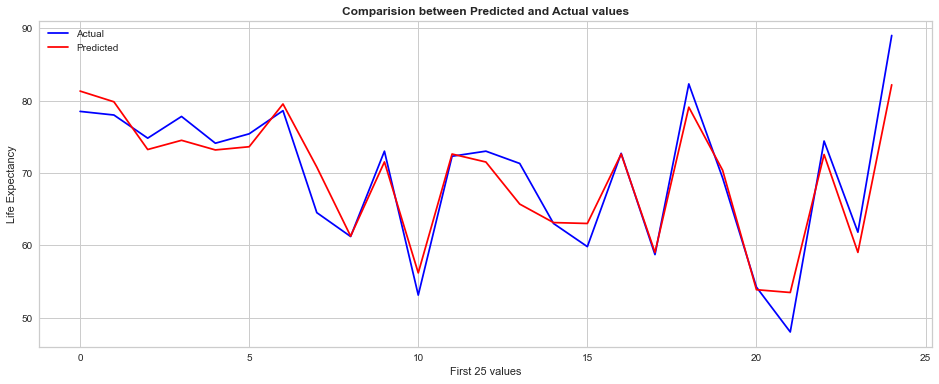

In [165]:
pred_vs_actual={'Actual':y_test,'Predicted':y2_pred_2}
df4=pd.DataFrame(data=pred_vs_actual)

df4=df3.reset_index(drop=True)
df4[:10]

plt.figure(figsize=(16,6))
linechart_1=plt.plot(df4[:25].index,y_test[:25],color='Blue')
linechart_2=plt.plot(df4[:25].index,y2_pred_2[:25],color='Red')
plt.xlabel('First 25 values')
plt.ylabel('Life Expectancy')
plt.title('Comparision between Predicted and Actual values',fontweight="bold")
plt.legend(['Actual','Predicted'])

In [166]:
df4[:20]

Actual  Predicted
0   78.5    76.986385
1   78.0    76.454978
2   74.8    74.838003
3   77.8    71.395658
4   74.1    72.033562
5   75.4    74.349098
6   78.6    74.770638
7   64.5    69.082262
8   61.2    63.491153
9   73.0    70.888965
10  53.1    58.556406
11  72.3    73.078171
12  73.0    71.601926
13  71.3    68.776962
14  63.0    62.831454
15  59.8    64.286087
16  72.7    70.624652
17  58.7    62.424879
18  82.3    74.257385
19  69.3    66.667367

In [158]:

model3=Ridge()
model3.fit(X_train,y_train)
y3_pred_1=model3.predict(X_train)
y3_pred_2=model3.predict(X_test)

print("*"*20,"Train R2 Score","*"*20)
print(r2(y_train,y3_pred_1))
print('')

print("*"*20,"Test R2 Score","*"*20)
print(r2(y_test,y3_pred_2))
print('')


******************** Train R2 Score ********************
0.8505548589319606

******************** Test R2 Score ********************
0.8355246366396134



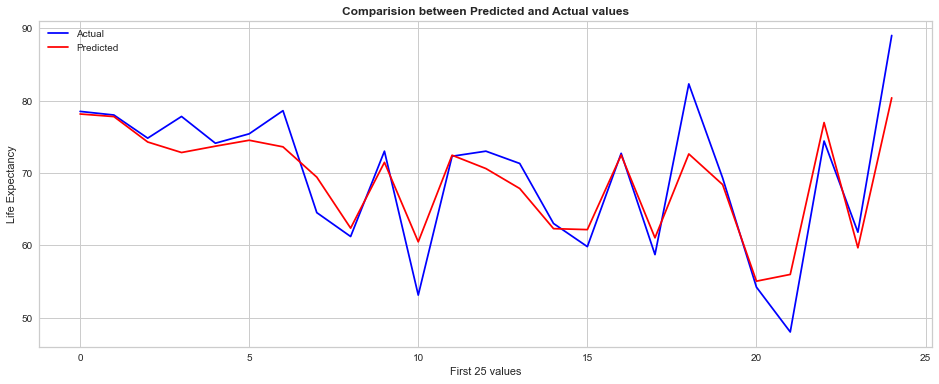

In [167]:
pred_vs_actual={'Actual':y_test,'Predicted':y3_pred_2}
df5=pd.DataFrame(data=pred_vs_actual)

df5=df5.reset_index(drop=True)
df5[:10]

plt.figure(figsize=(16,6))
linechart_1=plt.plot(df5[:25].index,y_test[:25],color='Blue')
linechart_2=plt.plot(df5[:25].index,y3_pred_2[:25],color='Red')
plt.xlabel('First 25 values')
plt.ylabel('Life Expectancy')
plt.title('Comparision between Predicted and Actual values',fontweight="bold")
plt.legend(['Actual','Predicted'])

In [168]:
df5[:20]

Actual  Predicted
0   78.5    78.140537
1   78.0    77.782697
2   74.8    74.268791
3   77.8    72.814191
4   74.1    73.689065
5   75.4    74.510426
6   78.6    73.598947
7   64.5    69.408239
8   61.2    62.357769
9   73.0    71.455023
10  53.1    60.462368
11  72.3    72.440502
12  73.0    70.595592
13  71.3    67.836478
14  63.0    62.287687
15  59.8    62.153331
16  72.7    72.467737
17  58.7    61.019040
18  82.3    72.615820
19  69.3    68.380391

In [160]:

model4=Lasso()
model4.fit(X_train,y_train)
y4_pred_1=model4.predict(X_train)
y4_pred_2=model4.predict(X_test)

print("*"*20,"Train R2 Score","*"*20)
print(r2(y_train,y4_pred_1))
print('')

print("*"*20,"Test R2 Score","*"*20)
print(r2(y_test,y4_pred_2))
print('')


******************** Train R2 Score ********************
0.8107665817451327

******************** Test R2 Score ********************
0.7854341074874345



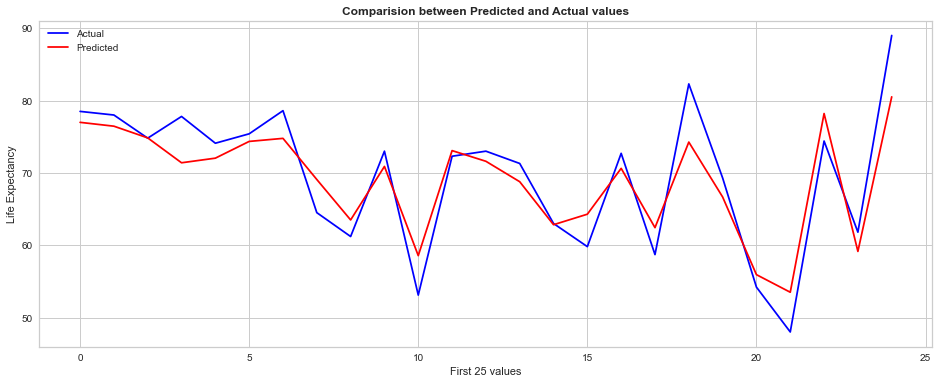

In [169]:
pred_vs_actual={'Actual':y_test,'Predicted':y4_pred_2}
df6=pd.DataFrame(data=pred_vs_actual)

df6=df3.reset_index(drop=True)
df6[:10]

plt.figure(figsize=(16,6))
linechart_1=plt.plot(df6[:25].index,y_test[:25],color='Blue')
linechart_2=plt.plot(df6[:25].index,y4_pred_2[:25],color='Red')
plt.xlabel('First 25 values')
plt.ylabel('Life Expectancy')
plt.title('Comparision between Predicted and Actual values',fontweight="bold")
plt.legend(['Actual','Predicted'])

In [170]:
df6[:20]

Actual  Predicted
0   78.5    76.986385
1   78.0    76.454978
2   74.8    74.838003
3   77.8    71.395658
4   74.1    72.033562
5   75.4    74.349098
6   78.6    74.770638
7   64.5    69.082262
8   61.2    63.491153
9   73.0    70.888965
10  53.1    58.556406
11  72.3    73.078171
12  73.0    71.601926
13  71.3    68.776962
14  63.0    62.831454
15  59.8    64.286087
16  72.7    70.624652
17  58.7    62.424879
18  82.3    74.257385
19  69.3    66.667367